- 370개의 피처로 주어진 데이터 세트 기반에서 고객 만족 여부를 예측
- 피처 이름은 모두 익명 처리돼 이름만을 가지고 어떤 속성인지는 추정할 수 없음
- 클래스 레이블 명은 TARGET 으로 1이면 불만 0이면 만족
- 모델의 성은 평가는 ROC-AUC로 평가
- 대부분이 만족이고 불만족인 데이터는 일부일 것이기 때문에 정확도 수치 보다는 ROC-AUC가 더 적합하다.
- [데이터 다운로드](http://www.kaggle.com/c/santander-customer-satisfaction/data)

### <데이터 전처리>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

df = pd.read_csv('./data/train.csv')

In [2]:

print('dataset shape:',df.shape)
df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


- 111개가 float형 260개가 int형으로 모든 피처가 숫자형이고 Null 값은 없다.
- 전체데이터에서 만족/불만족 비율을 본다.

In [4]:
print(df['TARGET'].value_counts())
unsatisfied_cnt = df[df['TARGET'] == 1]['TARGET'].count()
total_cnt = df['TARGET'].count()
print('unsatisfied 비율은 {:.2f}%'.format(unsatisfied_cnt/total_cnt*100))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 3.96%


- DataFrame의 describe()를 이용하여 각 피처의 값 분포를 확인해 본다.

In [5]:
df.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


- var3 칼럼의 경우 min 값이 -999999 이다. NaN 이나 특정 예외 값을 -999999로 변환했을 가능성이 높다.

In [6]:
print(df['var3'].value_counts()[:5])

 2         74165
 8           138
-999999      116
 9           110
 3           108
Name: var3, dtype: int64


- var3은 숫자형이고 다른 값에 비해 -999999는 편차가 심하므로 가장 값이 많은 2로 대체하기로 한다.
- ID 피처는 단순 식별자이므로 드롭하고
- 클래스 데이터 세트와 피처 데이터 세트를 분리해 별도의 데이터 세트로 저장하도록 한다.

In [7]:
df['var3'].replace(-999999, 2, inplace=True)
df.drop('ID', axis=1, inplace=True)

In [8]:
# 피처 세트와 레이블 세트 분리
X_features = df.iloc[:,:-1]
y_labels = df.iloc[:,-1]
print('피처 데이터 shape : {}'.format(X_features.shape))

피처 데이터 shape : (76020, 369)


- 학습과 성능 평가를 위해 원본 데이터 세트에서 학습 데이터 세트와 테스트 데이터 세트 분리
- 비대칭한 데이터 세트이므로 클래스인 Taret 값 분포도가 비슷한지 확인한다.


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.2, random_state=0)

train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape : {}, 테스트 세트 Shape : {}'.format(X_train.shape, X_test.shape))

print('학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt*100)
print('\n테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt*100)

학습 세트 Shape : (60816, 369), 테스트 세트 Shape : (15204, 369)
학습 세트 레이블 값 분포 비율
0    96.096422
1     3.903578
Name: TARGET, dtype: float64

테스트 세트 레이블 값 분포 비율
0    95.830045
1     4.169955
Name: TARGET, dtype: float64


- 원본 데이터와 유사하게 전체 데이터의 4% 정도의 불만족 값으로 만들어졌다.

### XGB 모델 학습과 하이퍼 파라미터 튜닝



- 성능 평가기준이 ROC-AUC 이므로 eval_metric 은 'auc'로 설정 ->logloss로 해도 큰 차이는 없다고함
- 평가 데이터 세트는 앞에서 분리한 테스트 데이터 세트를 이용한다.


In [11]:

from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
eval_set=[(X_train, y_train), (X_test, y_test)]
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=eval_set)


[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[141]	validation_0-auc:0.861418	validation_1-auc:0.841259
[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=500,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=156, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [24]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {0:.4f}'.format(xgb_roc_score))

ROC AUC : 0.8419


### XGB 하이퍼 파라미터 튜닝
- 학습시간이 많이 필요한 ML 모델인 경우 2~3 개정도 파라미터를 결합해 최적 파라미터를 찾은 뒤 최적 파라미터 기반으로 다시 1~2개 파라미터를 결합해 파라미터 튜닝을 한다.
- 이 예제의 경우 칼럼의 개수가 많으므로 과적합 가능성으르 가정하고 max_depth, min_child_weight, colsample_bytree 하이퍼 파라미터만 일차 튜닝 대상으로 잡는다.

In [30]:
from sklearn.model_selection import GridSearchCV

# n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {
    'max_depth':[5,7],
    'min_child_weight': [1, 3],
    'ciolsample_by_tree':[0.5, 0.75]
}

# 하이퍼 파라미터 테스트의 수행속도를 향상시키기 위해 cv는 따로 지정하지 않음
gridcv = GridSearchCV(xgb_clf, param_grid = params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=eval_set)

/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[0]	validation_0-auc:0.8067	validation_1-auc:0.808628
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.812173	validation_1-auc:0.814723
[2]	validation_0-auc:0.819333	validation_1-auc:0.819857
[3]	validation_0-auc:0.82436	validation_1-auc:0.822985
[4]	validation_0-auc:0.82717	validation_1-auc:0.824473
[5]	validation_0-auc:0.827358	validation_1-auc:0.825012
[6]	validation_0-auc:0.829552	validation_1-auc:0.825258
[7]	validation_0-auc:0.830441	validation_1-auc:0.826006
[8]	validation_0-auc:0.831127	validation_1-auc:0.826686
[9]	validation_0-auc:0.83111	validation_1-auc:0.826045
[10]	validation_0-auc:0.832723	validation_1-auc:0.82659
[11]	validation_0-auc:0.834701	validation_1-auc:0.828936
[12]	validation_0-auc:0.836559	validation_1-auc:0.830468
[13]	validation_0-auc:0.837106	validation_1-auc:0.830393
[14]	validation_0-auc:0.8381	validation_1-auc:0.830959
[15]	v

[71]	validation_0-auc:0.871191	validation_1-auc:0.840922
[72]	validation_0-auc:0.871379	validation_1-auc:0.840866
[73]	validation_0-auc:0.871695	validation_1-auc:0.841341
[74]	validation_0-auc:0.871796	validation_1-auc:0.841294
[75]	validation_0-auc:0.872077	validation_1-auc:0.841421
[76]	validation_0-auc:0.872339	validation_1-auc:0.84159
[77]	validation_0-auc:0.872432	validation_1-auc:0.841511
[78]	validation_0-auc:0.872562	validation_1-auc:0.84151
[79]	validation_0-auc:0.872562	validation_1-auc:0.841524
[80]	validation_0-auc:0.873093	validation_1-auc:0.841375
[81]	validation_0-auc:0.873197	validation_1-auc:0.841368
[82]	validation_0-auc:0.873469	validation_1-auc:0.841513
[83]	validation_0-auc:0.873688	validation_1-auc:0.841386
[84]	validation_0-auc:0.873767	validation_1-auc:0.84147
[85]	validation_0-auc:0.87386	validation_1-auc:0.841411
[86]	validation_0-auc:0.874176	validation_1-auc:0.841233
[87]	validation_0-auc:0.874278	validation_1-auc:0.841245
[88]	validation_0-auc:0.874395	vali

[19]	validation_0-auc:0.841854	validation_1-auc:0.834412
[20]	validation_0-auc:0.842357	validation_1-auc:0.834498
[21]	validation_0-auc:0.843928	validation_1-auc:0.834655
[22]	validation_0-auc:0.844636	validation_1-auc:0.834749
[23]	validation_0-auc:0.845233	validation_1-auc:0.835251
[24]	validation_0-auc:0.845354	validation_1-auc:0.834573
[25]	validation_0-auc:0.845441	validation_1-auc:0.834905
[26]	validation_0-auc:0.845846	validation_1-auc:0.8353
[27]	validation_0-auc:0.846393	validation_1-auc:0.835411
[28]	validation_0-auc:0.846768	validation_1-auc:0.835492
[29]	validation_0-auc:0.847118	validation_1-auc:0.83496
[30]	validation_0-auc:0.847467	validation_1-auc:0.835256
[31]	validation_0-auc:0.848002	validation_1-auc:0.83583
[32]	validation_0-auc:0.848762	validation_1-auc:0.835808
[33]	validation_0-auc:0.849341	validation_1-auc:0.837085
[34]	validation_0-auc:0.850097	validation_1-auc:0.836984
[35]	validation_0-auc:0.851206	validation_1-auc:0.837332
[36]	validation_0-auc:0.851892	vali

[78]	validation_0-auc:0.868111	validation_1-auc:0.840028
[79]	validation_0-auc:0.868246	validation_1-auc:0.839984
[80]	validation_0-auc:0.86834	validation_1-auc:0.83984
Stopping. Best iteration:
[50]	validation_0-auc:0.860823	validation_1-auc:0.841034

[0]	validation_0-auc:0.818914	validation_1-auc:0.816953
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.821376	validation_1-auc:0.817688
[2]	validation_0-auc:0.82453	validation_1-auc:0.818919
[3]	validation_0-auc:0.828135	validation_1-auc:0.821729
[4]	validation_0-auc:0.830461	validation_1-auc:0.824952
[5]	validation_0-auc:0.833251	validation_1-auc:0.826207
[6]	validation_0-auc:0.833586	validation_1-auc:0.826572
[7]	validation_0-auc:0.833717	validation_1-auc:0.826571
[8]	validation_0-auc:0.834366	validation_1-auc:0.828614
[9]	validation_0-auc:0.834993	validation_1-auc:0.828601
[10]	validation_0-auc:0.836748	

[35]	validation_0-auc:0.872584	validation_1-auc:0.836635
[36]	validation_0-auc:0.873954	validation_1-auc:0.835964
[37]	validation_0-auc:0.874913	validation_1-auc:0.835788
[38]	validation_0-auc:0.876125	validation_1-auc:0.835684
[39]	validation_0-auc:0.876969	validation_1-auc:0.835765
[40]	validation_0-auc:0.877579	validation_1-auc:0.835753
[41]	validation_0-auc:0.87822	validation_1-auc:0.835632
[42]	validation_0-auc:0.878983	validation_1-auc:0.835501
[43]	validation_0-auc:0.879574	validation_1-auc:0.835473
[44]	validation_0-auc:0.880037	validation_1-auc:0.835565
[45]	validation_0-auc:0.880556	validation_1-auc:0.835462
[46]	validation_0-auc:0.880933	validation_1-auc:0.835959
[47]	validation_0-auc:0.881175	validation_1-auc:0.835931
[48]	validation_0-auc:0.881448	validation_1-auc:0.835952
[49]	validation_0-auc:0.882301	validation_1-auc:0.835707
[50]	validation_0-auc:0.8828	validation_1-auc:0.835639
[51]	validation_0-auc:0.88308	validation_1-auc:0.835476
[52]	validation_0-auc:0.883346	vali

[19]	validation_0-auc:0.858592	validation_1-auc:0.8335
[20]	validation_0-auc:0.859075	validation_1-auc:0.833782
[21]	validation_0-auc:0.860333	validation_1-auc:0.83415
[22]	validation_0-auc:0.862205	validation_1-auc:0.834467
[23]	validation_0-auc:0.862767	validation_1-auc:0.834885
[24]	validation_0-auc:0.863617	validation_1-auc:0.83487
[25]	validation_0-auc:0.865581	validation_1-auc:0.834515
[26]	validation_0-auc:0.866105	validation_1-auc:0.83486
[27]	validation_0-auc:0.86846	validation_1-auc:0.835302
[28]	validation_0-auc:0.86997	validation_1-auc:0.835322
[29]	validation_0-auc:0.871395	validation_1-auc:0.835583
[30]	validation_0-auc:0.872367	validation_1-auc:0.835542
[31]	validation_0-auc:0.873544	validation_1-auc:0.835678
[32]	validation_0-auc:0.874803	validation_1-auc:0.836276
[33]	validation_0-auc:0.875511	validation_1-auc:0.836705
[34]	validation_0-auc:0.877353	validation_1-auc:0.836762
[35]	validation_0-auc:0.878071	validation_1-auc:0.837258
[36]	validation_0-auc:0.879106	validat

[7]	validation_0-auc:0.838259	validation_1-auc:0.823664
[8]	validation_0-auc:0.83946	validation_1-auc:0.82432
[9]	validation_0-auc:0.839879	validation_1-auc:0.825142
[10]	validation_0-auc:0.841203	validation_1-auc:0.825042
[11]	validation_0-auc:0.844783	validation_1-auc:0.828587
[12]	validation_0-auc:0.845655	validation_1-auc:0.828883
[13]	validation_0-auc:0.849844	validation_1-auc:0.829754
[14]	validation_0-auc:0.850864	validation_1-auc:0.830413
[15]	validation_0-auc:0.853042	validation_1-auc:0.830955
[16]	validation_0-auc:0.854499	validation_1-auc:0.831171
[17]	validation_0-auc:0.855374	validation_1-auc:0.832199
[18]	validation_0-auc:0.856572	validation_1-auc:0.833355
[19]	validation_0-auc:0.857563	validation_1-auc:0.833788
[20]	validation_0-auc:0.858417	validation_1-auc:0.834343
[21]	validation_0-auc:0.859214	validation_1-auc:0.835327
[22]	validation_0-auc:0.860407	validation_1-auc:0.835895
[23]	validation_0-auc:0.861923	validation_1-auc:0.836577
[24]	validation_0-auc:0.862633	valid

[65]	validation_0-auc:0.884178	validation_1-auc:0.838967
[66]	validation_0-auc:0.884598	validation_1-auc:0.839385
[67]	validation_0-auc:0.884623	validation_1-auc:0.839411
[68]	validation_0-auc:0.884805	validation_1-auc:0.839325
[69]	validation_0-auc:0.885261	validation_1-auc:0.839384
[70]	validation_0-auc:0.885713	validation_1-auc:0.839352
[71]	validation_0-auc:0.885797	validation_1-auc:0.839321
[72]	validation_0-auc:0.885845	validation_1-auc:0.83925
[73]	validation_0-auc:0.886005	validation_1-auc:0.83914
[74]	validation_0-auc:0.886405	validation_1-auc:0.839258
[75]	validation_0-auc:0.886631	validation_1-auc:0.839195
[76]	validation_0-auc:0.887031	validation_1-auc:0.839749
[77]	validation_0-auc:0.887124	validation_1-auc:0.839655
[78]	validation_0-auc:0.887179	validation_1-auc:0.839668
[79]	validation_0-auc:0.88721	validation_1-auc:0.839637
[80]	validation_0-auc:0.88746	validation_1-auc:0.83967
[81]	validation_0-auc:0.887579	validation_1-auc:0.83956
[82]	validation_0-auc:0.887825	valida

[36]	validation_0-auc:0.856107	validation_1-auc:0.837578
[37]	validation_0-auc:0.856601	validation_1-auc:0.838123
[38]	validation_0-auc:0.857327	validation_1-auc:0.8383
[39]	validation_0-auc:0.857821	validation_1-auc:0.838743
[40]	validation_0-auc:0.858624	validation_1-auc:0.838829
[41]	validation_0-auc:0.859461	validation_1-auc:0.839081
[42]	validation_0-auc:0.859911	validation_1-auc:0.839437
[43]	validation_0-auc:0.860478	validation_1-auc:0.83941
[44]	validation_0-auc:0.860778	validation_1-auc:0.839767
[45]	validation_0-auc:0.861408	validation_1-auc:0.839697
[46]	validation_0-auc:0.861799	validation_1-auc:0.839579
[47]	validation_0-auc:0.862216	validation_1-auc:0.839984
[48]	validation_0-auc:0.862637	validation_1-auc:0.84026
[49]	validation_0-auc:0.862928	validation_1-auc:0.8404
[50]	validation_0-auc:0.863245	validation_1-auc:0.840559
[51]	validation_0-auc:0.86391	validation_1-auc:0.840609
[52]	validation_0-auc:0.864075	validation_1-auc:0.84049
[53]	validation_0-auc:0.864396	validati

[78]	validation_0-auc:0.871903	validation_1-auc:0.841439
[79]	validation_0-auc:0.871925	validation_1-auc:0.841406
[80]	validation_0-auc:0.872039	validation_1-auc:0.841566
[81]	validation_0-auc:0.872275	validation_1-auc:0.841579
[82]	validation_0-auc:0.872377	validation_1-auc:0.84149
[83]	validation_0-auc:0.87241	validation_1-auc:0.841516
[84]	validation_0-auc:0.872706	validation_1-auc:0.841524
[85]	validation_0-auc:0.872879	validation_1-auc:0.84157
[86]	validation_0-auc:0.873245	validation_1-auc:0.841595
[87]	validation_0-auc:0.873391	validation_1-auc:0.841575
[88]	validation_0-auc:0.873418	validation_1-auc:0.841627
[89]	validation_0-auc:0.87356	validation_1-auc:0.84174
Stopping. Best iteration:
[59]	validation_0-auc:0.867161	validation_1-auc:0.841921

[0]	validation_0-auc:0.807999	validation_1-auc:0.808048
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.8

[43]	validation_0-auc:0.858428	validation_1-auc:0.840419
[44]	validation_0-auc:0.858762	validation_1-auc:0.840324
[45]	validation_0-auc:0.859227	validation_1-auc:0.840415
[46]	validation_0-auc:0.859556	validation_1-auc:0.840999
[47]	validation_0-auc:0.859887	validation_1-auc:0.840735
[48]	validation_0-auc:0.860376	validation_1-auc:0.840838
[49]	validation_0-auc:0.860641	validation_1-auc:0.840791
[50]	validation_0-auc:0.860823	validation_1-auc:0.841034
[51]	validation_0-auc:0.861304	validation_1-auc:0.841006
[52]	validation_0-auc:0.861713	validation_1-auc:0.840588
[53]	validation_0-auc:0.862204	validation_1-auc:0.840348
[54]	validation_0-auc:0.862484	validation_1-auc:0.839976
[55]	validation_0-auc:0.862869	validation_1-auc:0.84007
[56]	validation_0-auc:0.863216	validation_1-auc:0.840055
[57]	validation_0-auc:0.863482	validation_1-auc:0.840318
[58]	validation_0-auc:0.864093	validation_1-auc:0.840118
[59]	validation_0-auc:0.864311	validation_1-auc:0.840091
[60]	validation_0-auc:0.864617	v

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.818838	validation_1-auc:0.815221
[2]	validation_0-auc:0.825576	validation_1-auc:0.819766
[3]	validation_0-auc:0.830121	validation_1-auc:0.82363
[4]	validation_0-auc:0.833204	validation_1-auc:0.824473
[5]	validation_0-auc:0.834272	validation_1-auc:0.825269
[6]	validation_0-auc:0.835311	validation_1-auc:0.825507
[7]	validation_0-auc:0.837037	validation_1-auc:0.826384
[8]	validation_0-auc:0.838513	validation_1-auc:0.826933
[9]	validation_0-auc:0.84086	validation_1-auc:0.829259
[10]	validation_0-auc:0.84197	validation_1-auc:0.828978
[11]	validation_0-auc:0.843145	validation_1-auc:0.829488
[12]	validation_0-auc:0.845802	validation_1-auc:0.831338
[13]	validation_0-auc:0.846263	validation_1-auc:0.831857
[14]	validation_0-auc:0.84899	validation_1-auc:0.83285
[15]	validation_0-auc:0.84975	validation_1-auc:0.833528
[16]	validation_0-auc:0.850515	validation_1-auc:0.833345
[17]	validation_0-auc:0.851464	validati

[79]	validation_0-auc:0.894029	validation_1-auc:0.839205
[80]	validation_0-auc:0.894101	validation_1-auc:0.839181
[81]	validation_0-auc:0.894117	validation_1-auc:0.839152
[82]	validation_0-auc:0.89417	validation_1-auc:0.83922
[83]	validation_0-auc:0.894245	validation_1-auc:0.839295
[84]	validation_0-auc:0.894539	validation_1-auc:0.83901
[85]	validation_0-auc:0.894612	validation_1-auc:0.839033
[86]	validation_0-auc:0.894663	validation_1-auc:0.839138
[87]	validation_0-auc:0.894682	validation_1-auc:0.839077
[88]	validation_0-auc:0.894971	validation_1-auc:0.838941
[89]	validation_0-auc:0.894971	validation_1-auc:0.838916
[90]	validation_0-auc:0.895055	validation_1-auc:0.838932
Stopping. Best iteration:
[60]	validation_0-auc:0.888303	validation_1-auc:0.839678

[0]	validation_0-auc:0.824831	validation_1-auc:0.817957
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0

[40]	validation_0-auc:0.872161	validation_1-auc:0.836038
[41]	validation_0-auc:0.87267	validation_1-auc:0.83585
[42]	validation_0-auc:0.873179	validation_1-auc:0.83589
[43]	validation_0-auc:0.873513	validation_1-auc:0.836111
[44]	validation_0-auc:0.874098	validation_1-auc:0.836112
[45]	validation_0-auc:0.874537	validation_1-auc:0.836252
[46]	validation_0-auc:0.874891	validation_1-auc:0.836144
[47]	validation_0-auc:0.875377	validation_1-auc:0.836256
[48]	validation_0-auc:0.875572	validation_1-auc:0.836513
[49]	validation_0-auc:0.876009	validation_1-auc:0.836298
[50]	validation_0-auc:0.87635	validation_1-auc:0.836309
[51]	validation_0-auc:0.876981	validation_1-auc:0.836779
[52]	validation_0-auc:0.877038	validation_1-auc:0.836797
[53]	validation_0-auc:0.877123	validation_1-auc:0.836885
[54]	validation_0-auc:0.87721	validation_1-auc:0.836996
[55]	validation_0-auc:0.877376	validation_1-auc:0.837135
[56]	validation_0-auc:0.877639	validation_1-auc:0.837239
[57]	validation_0-auc:0.877928	valid

[30]	validation_0-auc:0.868117	validation_1-auc:0.83465
[31]	validation_0-auc:0.868902	validation_1-auc:0.83493
[32]	validation_0-auc:0.869484	validation_1-auc:0.834927
[33]	validation_0-auc:0.870357	validation_1-auc:0.835246
[34]	validation_0-auc:0.870942	validation_1-auc:0.835767
[35]	validation_0-auc:0.871773	validation_1-auc:0.835795
[36]	validation_0-auc:0.872029	validation_1-auc:0.835455
[37]	validation_0-auc:0.872857	validation_1-auc:0.835383
[38]	validation_0-auc:0.873878	validation_1-auc:0.835082
[39]	validation_0-auc:0.874739	validation_1-auc:0.835711
[40]	validation_0-auc:0.875543	validation_1-auc:0.83645
[41]	validation_0-auc:0.876071	validation_1-auc:0.836874
[42]	validation_0-auc:0.876756	validation_1-auc:0.837339
[43]	validation_0-auc:0.877132	validation_1-auc:0.837408
[44]	validation_0-auc:0.877465	validation_1-auc:0.837634
[45]	validation_0-auc:0.878092	validation_1-auc:0.83804
[46]	validation_0-auc:0.878431	validation_1-auc:0.838125
[47]	validation_0-auc:0.87875	valid

[72]	validation_0-auc:0.900222	validation_1-auc:0.840262
[73]	validation_0-auc:0.900635	validation_1-auc:0.840341
Stopping. Best iteration:
[43]	validation_0-auc:0.887599	validation_1-auc:0.840999



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [5, 7], 'min_child_weight': [1, 3], 'ciolsample_by_tree': [0.5, 0.75]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
print('GridSearchCV 최적 파라미터 : ', gridcv.best_params_)

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {:.4f}'.format(xgb_roc_score))

GridSearchCV 최적 파라미터 :  {'ciolsample_by_tree': 0.5, 'max_depth': 7, 'min_child_weight': 3}
ROC AUC: 0.8410


- 최적화 하이퍼 파라미터를 기반으로 다른 하이퍼 파라미터를 변경, 추가 해 다시 최적화 진행
- colsample_by_tree : 0.5, max_depth :7, min_child_weight:3 로 하고 n_estimators는 1000, learning_rate는 0.02로 그리고 reg_alpha=0.03 으로 하여 다시 학습 시킨뒤 ROC_AUC를 구해본다.


In [43]:
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=7, 
                        min_child_weight=3, colsample_bytree=0.5, reg_alpha=0.03)

xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, eval_metric='auc', eval_set=eval_set)


[0]	validation_0-auc:0.732133	validation_1-auc:0.738945
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.818427	validation_1-auc:0.81731
[2]	validation_0-auc:0.812935	validation_1-auc:0.80911
[3]	validation_0-auc:0.810393	validation_1-auc:0.804771
[4]	validation_0-auc:0.816407	validation_1-auc:0.811785
[5]	validation_0-auc:0.816191	validation_1-auc:0.809195
[6]	validation_0-auc:0.818237	validation_1-auc:0.812533
[7]	validation_0-auc:0.8164	validation_1-auc:0.810559
[8]	validation_0-auc:0.815812	validation_1-auc:0.81012
[9]	validation_0-auc:0.814415	validation_1-auc:0.809162
[10]	validation_0-auc:0.82174	validation_1-auc:0.81623
[11]	validation_0-auc:0.826469	validation_1-auc:0.820656
[12]	validation_0-auc:0.82564	validation_1-auc:0.820683
[13]	validation_0-auc:0.825261	validation_1-auc:0.819751
[14]	validation_0-auc:0.824906	validation_1-auc:0.819624
[15]	

[141]	validation_0-auc:0.869885	validation_1-auc:0.839813
[142]	validation_0-auc:0.86992	validation_1-auc:0.839729
[143]	validation_0-auc:0.87029	validation_1-auc:0.84008
[144]	validation_0-auc:0.87017	validation_1-auc:0.839864
[145]	validation_0-auc:0.870795	validation_1-auc:0.840169
[146]	validation_0-auc:0.871183	validation_1-auc:0.840359
[147]	validation_0-auc:0.871195	validation_1-auc:0.840211
[148]	validation_0-auc:0.871517	validation_1-auc:0.840426
[149]	validation_0-auc:0.871863	validation_1-auc:0.840868
[150]	validation_0-auc:0.872358	validation_1-auc:0.841091
[151]	validation_0-auc:0.872241	validation_1-auc:0.840945
[152]	validation_0-auc:0.872553	validation_1-auc:0.84113
[153]	validation_0-auc:0.872455	validation_1-auc:0.841005
[154]	validation_0-auc:0.872831	validation_1-auc:0.841267
[155]	validation_0-auc:0.872979	validation_1-auc:0.841231
[156]	validation_0-auc:0.872935	validation_1-auc:0.841159
[157]	validation_0-auc:0.873066	validation_1-auc:0.840936
[158]	validation_0-

[283]	validation_0-auc:0.894076	validation_1-auc:0.84623
[284]	validation_0-auc:0.894212	validation_1-auc:0.846204
[285]	validation_0-auc:0.894281	validation_1-auc:0.846228
[286]	validation_0-auc:0.894372	validation_1-auc:0.846277
[287]	validation_0-auc:0.894429	validation_1-auc:0.846256
[288]	validation_0-auc:0.894501	validation_1-auc:0.846348
[289]	validation_0-auc:0.894511	validation_1-auc:0.846338
[290]	validation_0-auc:0.894643	validation_1-auc:0.846484
[291]	validation_0-auc:0.894731	validation_1-auc:0.846468
[292]	validation_0-auc:0.894834	validation_1-auc:0.846405
[293]	validation_0-auc:0.89495	validation_1-auc:0.846357
[294]	validation_0-auc:0.894985	validation_1-auc:0.846314
[295]	validation_0-auc:0.89509	validation_1-auc:0.846217
[296]	validation_0-auc:0.895165	validation_1-auc:0.846173
[297]	validation_0-auc:0.895189	validation_1-auc:0.846164
[298]	validation_0-auc:0.895277	validation_1-auc:0.846235
[299]	validation_0-auc:0.895338	validation_1-auc:0.846269
[300]	validation_

[425]	validation_0-auc:0.90285	validation_1-auc:0.845791
[426]	validation_0-auc:0.902894	validation_1-auc:0.845797
[427]	validation_0-auc:0.902925	validation_1-auc:0.845786
[428]	validation_0-auc:0.902939	validation_1-auc:0.845784
[429]	validation_0-auc:0.902958	validation_1-auc:0.845801
[430]	validation_0-auc:0.902981	validation_1-auc:0.845775
[431]	validation_0-auc:0.90299	validation_1-auc:0.845744
[432]	validation_0-auc:0.90301	validation_1-auc:0.845722
[433]	validation_0-auc:0.903023	validation_1-auc:0.845717
[434]	validation_0-auc:0.903034	validation_1-auc:0.84573
[435]	validation_0-auc:0.903071	validation_1-auc:0.845778
[436]	validation_0-auc:0.903079	validation_1-auc:0.845759
[437]	validation_0-auc:0.903114	validation_1-auc:0.845739
[438]	validation_0-auc:0.903132	validation_1-auc:0.845732
[439]	validation_0-auc:0.903141	validation_1-auc:0.845714
[440]	validation_0-auc:0.903153	validation_1-auc:0.845697
[441]	validation_0-auc:0.903164	validation_1-auc:0.845693
[442]	validation_0

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=0, learning_rate=0.02, max_delta_step=0,
       max_depth=7, min_child_weight=3, missing=None, n_estimators=1000,
       n_jobs=1, nthread=None, objective='binary:logistic',
       random_state=156, reg_alpha=0.03, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

In [44]:
xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {:.4f}'.format(xgb_roc_score))

ROC AUC : 0.8465


- 이전 테스트 보다 향상된 결과를 나타내지만 수행시간이 많이 요구된다. 그 때문에 하이퍼 파라미터를 다양하게 나열해 파라미터를 튜닝하는 것은 많은 시간이 소모된다.그리고 앙상블 계열 알고리즘에서 하이퍼 파라미터 튜닝으로 성능 수치 개선이 급격하게 되는 경우는 많지 않다.

### 튜닝된 모델에서 각 피처의 중요도를 피처 중요도로 그래프로 나타내기

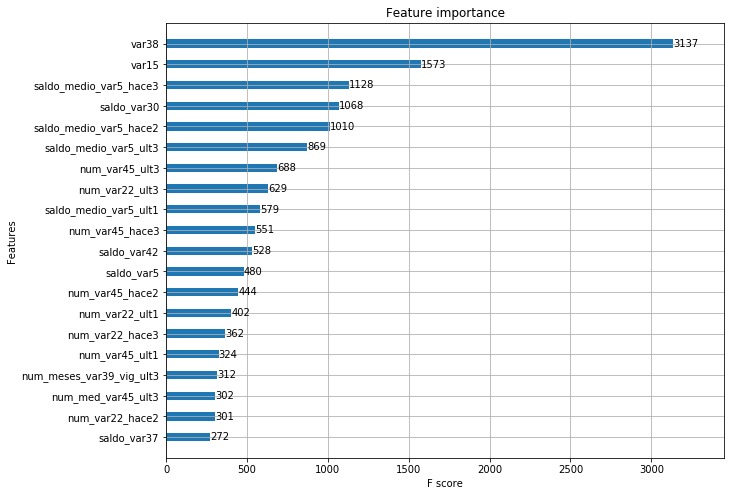

In [49]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))
plot_importance(xgb_clf, ax=ax, max_num_features=20, height=0.4)
plt.show()

### LGBM 모델 학습과 하이퍼 파라미터 튜닝
- xgb와 동일하게 n_estimators 는 500으로 early_stopping_rounds는 100 으로 평가 데이터 세트는 테스트 데이터세트, eval_metric은 auc로 설정


In [50]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals=[(X_test, y_test)]

lgbm_clf.fit(X_train, y_train, early_stopping_rounds=500, eval_metric='auc', eval_set=evals, verbose=True)


[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 500 rounds.
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.14

[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
[143]	valid_0's auc: 0.834	valid_0's binary_logloss: 0.141418
[144]	valid_0's auc: 0.833915	valid_0's binary_logloss: 0.141453
[145]	valid_0's auc: 0.833916	valid

[263]	valid_0's auc: 0.828924	valid_0's binary_logloss: 0.144599
[264]	valid_0's auc: 0.828888	valid_0's binary_logloss: 0.144613
[265]	valid_0's auc: 0.828823	valid_0's binary_logloss: 0.144648
[266]	valid_0's auc: 0.82868	valid_0's binary_logloss: 0.144713
[267]	valid_0's auc: 0.82874	valid_0's binary_logloss: 0.144724
[268]	valid_0's auc: 0.82861	valid_0's binary_logloss: 0.144761
[269]	valid_0's auc: 0.828515	valid_0's binary_logloss: 0.144806
[270]	valid_0's auc: 0.828342	valid_0's binary_logloss: 0.14489
[271]	valid_0's auc: 0.8283	valid_0's binary_logloss: 0.144917
[272]	valid_0's auc: 0.828252	valid_0's binary_logloss: 0.144943
[273]	valid_0's auc: 0.828188	valid_0's binary_logloss: 0.144981
[274]	valid_0's auc: 0.828097	valid_0's binary_logloss: 0.145
[275]	valid_0's auc: 0.827871	valid_0's binary_logloss: 0.145075
[276]	valid_0's auc: 0.827869	valid_0's binary_logloss: 0.145087
[277]	valid_0's auc: 0.827712	valid_0's binary_logloss: 0.145149
[278]	valid_0's auc: 0.827526	vali

[396]	valid_0's auc: 0.820813	valid_0's binary_logloss: 0.149296
[397]	valid_0's auc: 0.820712	valid_0's binary_logloss: 0.149363
[398]	valid_0's auc: 0.820595	valid_0's binary_logloss: 0.149432
[399]	valid_0's auc: 0.820601	valid_0's binary_logloss: 0.149461
[400]	valid_0's auc: 0.820718	valid_0's binary_logloss: 0.149439
[401]	valid_0's auc: 0.820744	valid_0's binary_logloss: 0.14944
[402]	valid_0's auc: 0.8207	valid_0's binary_logloss: 0.14949
[403]	valid_0's auc: 0.820664	valid_0's binary_logloss: 0.149526
[404]	valid_0's auc: 0.820469	valid_0's binary_logloss: 0.1496
[405]	valid_0's auc: 0.82038	valid_0's binary_logloss: 0.14967
[406]	valid_0's auc: 0.820309	valid_0's binary_logloss: 0.149711
[407]	valid_0's auc: 0.820303	valid_0's binary_logloss: 0.14977
[408]	valid_0's auc: 0.820264	valid_0's binary_logloss: 0.149814
[409]	valid_0's auc: 0.82018	valid_0's binary_logloss: 0.149893
[410]	valid_0's auc: 0.820289	valid_0's binary_logloss: 0.149888
[411]	valid_0's auc: 0.820244	valid

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [51]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8396


- LightGBM 수행 결과 0.8396을 나타낸다.
- 수행시간이 많이 단축됐다.
- GridSearchCV로 좀 더 다양한 하이퍼 파라미터에 대한 튜닝을 한다.
- 튜닝 대상은 num_leaves, max_depth, min_child_samples, subsample

In [54]:
from sklearn.model_selection import GridSearchCV
# 수행속도 향상을 위해 n_estimators 를 200으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves':[32, 64],
          'max_depth':[128,160],
          'min_child_samples':[60,100],
          'subsample':[0.8, 1]
         }
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric='auc', eval_set=[(X_train,y_train),(X_test, y_test)])

/home/jeongmyeong/anaconda3/envs/tensorflow/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


[1]	valid_0's auc: 0.820235	valid_0's binary_logloss: 0.156085	valid_1's auc: 0.81613	valid_1's binary_logloss: 0.164998
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.825775	valid_0's binary_logloss: 0.150951	valid_1's auc: 0.821831	valid_1's binary_logloss: 0.15988
[3]	valid_0's auc: 0.832192	valid_0's binary_logloss: 0.147167	valid_1's auc: 0.827302	valid_1's binary_logloss: 0.156397
[4]	valid_0's auc: 0.837518	valid_0's binary_logloss: 0.144131	valid_1's auc: 0.8334	valid_1's binary_logloss: 0.153325
[5]	valid_0's auc: 0.842289	valid_0's binary_logloss: 0.141651	valid_1's auc: 0.836018	valid_1's binary_logloss: 0.150959
[6]	valid_0's auc: 0.844974	valid_0's binary_logloss: 0.139661	valid_1's auc: 0.838022	valid_1's binary_logloss: 0.149046
[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	v

[31]	valid_0's auc: 0.875603	valid_0's binary_logloss: 0.123747	valid_1's auc: 0.839226	valid_1's binary_logloss: 0.139539
[32]	valid_0's auc: 0.87651	valid_0's binary_logloss: 0.123413	valid_1's auc: 0.838983	valid_1's binary_logloss: 0.139561
[33]	valid_0's auc: 0.877103	valid_0's binary_logloss: 0.123199	valid_1's auc: 0.839235	valid_1's binary_logloss: 0.139528
[34]	valid_0's auc: 0.878189	valid_0's binary_logloss: 0.122925	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139567
[35]	valid_0's auc: 0.878765	valid_0's binary_logloss: 0.122704	valid_1's auc: 0.838946	valid_1's binary_logloss: 0.139572
[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 0.880571	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.13952
[39]	valid_0's auc:

[40]	valid_0's auc: 0.880399	valid_0's binary_logloss: 0.121938	valid_1's auc: 0.840127	valid_1's binary_logloss: 0.139314
[41]	valid_0's auc: 0.880914	valid_0's binary_logloss: 0.121757	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.13937
[42]	valid_0's auc: 0.881674	valid_0's binary_logloss: 0.121547	valid_1's auc: 0.839744	valid_1's binary_logloss: 0.139371
[43]	valid_0's auc: 0.882352	valid_0's binary_logloss: 0.121291	valid_1's auc: 0.839733	valid_1's binary_logloss: 0.139358
[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 0.884201	valid_0's binary_logloss: 0.120532	valid_1's auc: 0.839839	valid_1's binary_logloss: 0.139368
[48]	valid_0's auc:

[11]	valid_0's auc: 0.856414	valid_0's binary_logloss: 0.133277	valid_1's auc: 0.838921	valid_1's binary_logloss: 0.143737
[12]	valid_0's auc: 0.857283	valid_0's binary_logloss: 0.132431	valid_1's auc: 0.837263	valid_1's binary_logloss: 0.143197
[13]	valid_0's auc: 0.858075	valid_0's binary_logloss: 0.131688	valid_1's auc: 0.837254	valid_1's binary_logloss: 0.142633
[14]	valid_0's auc: 0.858945	valid_0's binary_logloss: 0.130983	valid_1's auc: 0.837669	valid_1's binary_logloss: 0.142158
[15]	valid_0's auc: 0.859875	valid_0's binary_logloss: 0.130335	valid_1's auc: 0.837434	valid_1's binary_logloss: 0.141848
[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc: 0.861681	valid_0's binary_logloss: 0.129123	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.14114
[18]	valid_0's auc: 0.863324	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.838024	valid_1's binary_logloss: 0.140911
[19]	valid_0's au

[21]	valid_0's auc: 0.866258	valid_0's binary_logloss: 0.127436	valid_1's auc: 0.83993	valid_1's binary_logloss: 0.140328
[22]	valid_0's auc: 0.867054	valid_0's binary_logloss: 0.127069	valid_1's auc: 0.840099	valid_1's binary_logloss: 0.14013
[23]	valid_0's auc: 0.867852	valid_0's binary_logloss: 0.126713	valid_1's auc: 0.839768	valid_1's binary_logloss: 0.140027
[24]	valid_0's auc: 0.868599	valid_0's binary_logloss: 0.126372	valid_1's auc: 0.840299	valid_1's binary_logloss: 0.139904
[25]	valid_0's auc: 0.869485	valid_0's binary_logloss: 0.126047	valid_1's auc: 0.840676	valid_1's binary_logloss: 0.139735
[26]	valid_0's auc: 0.870541	valid_0's binary_logloss: 0.125627	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.139708
[27]	valid_0's auc: 0.871191	valid_0's binary_logloss: 0.125319	valid_1's auc: 0.839924	valid_1's binary_logloss: 0.139651
[28]	valid_0's auc: 0.871788	valid_0's binary_logloss: 0.125064	valid_1's auc: 0.839647	valid_1's binary_logloss: 0.139574
[29]	valid_0's auc

[32]	valid_0's auc: 0.891349	valid_0's binary_logloss: 0.11798	valid_1's auc: 0.829723	valid_1's binary_logloss: 0.141529
[33]	valid_0's auc: 0.891896	valid_0's binary_logloss: 0.117633	valid_1's auc: 0.829851	valid_1's binary_logloss: 0.141488
[34]	valid_0's auc: 0.892553	valid_0's binary_logloss: 0.117331	valid_1's auc: 0.82916	valid_1's binary_logloss: 0.141607
[35]	valid_0's auc: 0.893197	valid_0's binary_logloss: 0.116998	valid_1's auc: 0.828503	valid_1's binary_logloss: 0.141781
[36]	valid_0's auc: 0.894242	valid_0's binary_logloss: 0.116658	valid_1's auc: 0.828875	valid_1's binary_logloss: 0.141779
Early stopping, best iteration is:
[6]	valid_0's auc: 0.857012	valid_0's binary_logloss: 0.137695	valid_1's auc: 0.834623	valid_1's binary_logloss: 0.14943
[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_lo

[18]	valid_0's auc: 0.878205	valid_0's binary_logloss: 0.124367	valid_1's auc: 0.835872	valid_1's binary_logloss: 0.141256
[19]	valid_0's auc: 0.879502	valid_0's binary_logloss: 0.12371	valid_1's auc: 0.835242	valid_1's binary_logloss: 0.141186
[20]	valid_0's auc: 0.880623	valid_0's binary_logloss: 0.123116	valid_1's auc: 0.835731	valid_1's binary_logloss: 0.140946
[21]	valid_0's auc: 0.881898	valid_0's binary_logloss: 0.122562	valid_1's auc: 0.834984	valid_1's binary_logloss: 0.140914
[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc:

[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	valid_1's binary_logloss: 0.146178
[9]	valid_0's auc: 0.865562	valid_0's binary_logloss: 0.132428	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.145107
[10]	valid_0's auc: 0.867401	valid_0's binary_logloss: 0.131116	valid_1's auc: 0.836429	valid_1's binary_logloss: 0.144153
[11]	valid_0's auc: 0.868477	valid_0's binary_logloss: 0.129981	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.143351
[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.

[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc: 0.890614	valid_0's binary_logloss: 0.118542	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.14008
[30]	valid_0's auc: 0.891023	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.83748	valid_1's binary_logloss: 0.140051
[31]	valid_0's auc: 0.891989	valid_0's binary_logloss: 0.117866	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.140006
[32]	valid_0's auc: 0.892909	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.140054
[33]	valid_0's auc: 0.893597	valid_0's binary_logloss: 0.117091	valid_1's auc: 0.836874	valid_1's binary_logloss: 0.140061
[34]	valid_0's auc: 

[11]	valid_0's auc: 0.855485	valid_0's binary_logloss: 0.133677	valid_1's auc: 0.838688	valid_1's binary_logloss: 0.14351
[12]	valid_0's auc: 0.856918	valid_0's binary_logloss: 0.132832	valid_1's auc: 0.838593	valid_1's binary_logloss: 0.142834
[13]	valid_0's auc: 0.857461	valid_0's binary_logloss: 0.132079	valid_1's auc: 0.838477	valid_1's binary_logloss: 0.142308
[14]	valid_0's auc: 0.858342	valid_0's binary_logloss: 0.131428	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.141925
[15]	valid_0's auc: 0.858926	valid_0's binary_logloss: 0.130816	valid_1's auc: 0.838543	valid_1's binary_logloss: 0.141466
[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 0.860793	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.140844
[18]	valid_0's auc: 0.861753	valid_0's binary_logloss: 0.12924	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.140599
[19]	valid_0's auc

[40]	valid_0's auc: 0.877543	valid_0's binary_logloss: 0.123003	valid_1's auc: 0.839944	valid_1's binary_logloss: 0.139144
[41]	valid_0's auc: 0.877994	valid_0's binary_logloss: 0.122806	valid_1's auc: 0.839925	valid_1's binary_logloss: 0.139157
[42]	valid_0's auc: 0.878413	valid_0's binary_logloss: 0.122608	valid_1's auc: 0.839588	valid_1's binary_logloss: 0.139183
[43]	valid_0's auc: 0.87868	valid_0's binary_logloss: 0.122482	valid_1's auc: 0.839828	valid_1's binary_logloss: 0.139122
[44]	valid_0's auc: 0.878844	valid_0's binary_logloss: 0.122346	valid_1's auc: 0.839999	valid_1's binary_logloss: 0.139112
[45]	valid_0's auc: 0.879115	valid_0's binary_logloss: 0.12219	valid_1's auc: 0.839862	valid_1's binary_logloss: 0.139105
[46]	valid_0's auc: 0.879426	valid_0's binary_logloss: 0.122041	valid_1's auc: 0.839926	valid_1's binary_logloss: 0.139086
[47]	valid_0's auc: 0.879882	valid_0's binary_logloss: 0.121829	valid_1's auc: 0.840044	valid_1's binary_logloss: 0.139063
[48]	valid_0's auc

[31]	valid_0's auc: 0.871414	valid_0's binary_logloss: 0.125161	valid_1's auc: 0.833041	valid_1's binary_logloss: 0.140216
[32]	valid_0's auc: 0.872281	valid_0's binary_logloss: 0.12493	valid_1's auc: 0.833344	valid_1's binary_logloss: 0.140148
[33]	valid_0's auc: 0.873038	valid_0's binary_logloss: 0.124672	valid_1's auc: 0.833307	valid_1's binary_logloss: 0.140091
[34]	valid_0's auc: 0.873571	valid_0's binary_logloss: 0.124499	valid_1's auc: 0.833239	valid_1's binary_logloss: 0.140069
[35]	valid_0's auc: 0.874263	valid_0's binary_logloss: 0.124311	valid_1's auc: 0.833202	valid_1's binary_logloss: 0.140067
[36]	valid_0's auc: 0.87467	valid_0's binary_logloss: 0.124165	valid_1's auc: 0.833345	valid_1's binary_logloss: 0.140029
[37]	valid_0's auc: 0.875299	valid_0's binary_logloss: 0.123937	valid_1's auc: 0.833447	valid_1's binary_logloss: 0.140009
[38]	valid_0's auc: 0.876178	valid_0's binary_logloss: 0.123686	valid_1's auc: 0.833499	valid_1's binary_logloss: 0.139986
[39]	valid_0's auc

[21]	valid_0's auc: 0.864129	valid_0's binary_logloss: 0.128163	valid_1's auc: 0.838539	valid_1's binary_logloss: 0.140401
[22]	valid_0's auc: 0.865066	valid_0's binary_logloss: 0.127776	valid_1's auc: 0.838552	valid_1's binary_logloss: 0.140268
[23]	valid_0's auc: 0.866036	valid_0's binary_logloss: 0.127415	valid_1's auc: 0.838667	valid_1's binary_logloss: 0.140163
[24]	valid_0's auc: 0.866894	valid_0's binary_logloss: 0.127047	valid_1's auc: 0.838711	valid_1's binary_logloss: 0.139983
[25]	valid_0's auc: 0.867646	valid_0's binary_logloss: 0.126759	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.13986
[26]	valid_0's auc: 0.868321	valid_0's binary_logloss: 0.126486	valid_1's auc: 0.83866	valid_1's binary_logloss: 0.139795
[27]	valid_0's auc: 0.869533	valid_0's binary_logloss: 0.126137	valid_1's auc: 0.838474	valid_1's binary_logloss: 0.13973
[28]	valid_0's auc: 0.87009	valid_0's binary_logloss: 0.125841	valid_1's auc: 0.838418	valid_1's binary_logloss: 0.139661
[29]	valid_0's auc: 0

[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc

[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc

[10]	valid_0's auc: 0.863676	valid_0's binary_logloss: 0.132396	valid_1's auc: 0.834954	valid_1's binary_logloss: 0.144707
[11]	valid_0's auc: 0.865339	valid_0's binary_logloss: 0.13134	valid_1's auc: 0.835252	valid_1's binary_logloss: 0.144034
[12]	valid_0's auc: 0.866817	valid_0's binary_logloss: 0.130311	valid_1's auc: 0.835592	valid_1's binary_logloss: 0.143404
[13]	valid_0's auc: 0.868751	valid_0's binary_logloss: 0.129388	valid_1's auc: 0.835225	valid_1's binary_logloss: 0.142853
[14]	valid_0's auc: 0.870283	valid_0's binary_logloss: 0.128551	valid_1's auc: 0.835191	valid_1's binary_logloss: 0.142412
[15]	valid_0's auc: 0.871366	valid_0's binary_logloss: 0.127828	valid_1's auc: 0.834681	valid_1's binary_logloss: 0.142173
[16]	valid_0's auc: 0.87234	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.834555	valid_1's binary_logloss: 0.141876
[17]	valid_0's auc: 0.872963	valid_0's binary_logloss: 0.126553	valid_1's auc: 0.833341	valid_1's binary_logloss: 0.141845
[18]	valid_0's auc

[35]	valid_0's auc: 0.892153	valid_0's binary_logloss: 0.117818	valid_1's auc: 0.838839	valid_1's binary_logloss: 0.139022
[36]	valid_0's auc: 0.892798	valid_0's binary_logloss: 0.117475	valid_1's auc: 0.838585	valid_1's binary_logloss: 0.139057
[37]	valid_0's auc: 0.893672	valid_0's binary_logloss: 0.117095	valid_1's auc: 0.838499	valid_1's binary_logloss: 0.139109
[38]	valid_0's auc: 0.894575	valid_0's binary_logloss: 0.116783	valid_1's auc: 0.83897	valid_1's binary_logloss: 0.139067
[39]	valid_0's auc: 0.895447	valid_0's binary_logloss: 0.116421	valid_1's auc: 0.838515	valid_1's binary_logloss: 0.139143
[40]	valid_0's auc: 0.896177	valid_0's binary_logloss: 0.116084	valid_1's auc: 0.838353	valid_1's binary_logloss: 0.13918
[41]	valid_0's auc: 0.896821	valid_0's binary_logloss: 0.115822	valid_1's auc: 0.837933	valid_1's binary_logloss: 0.139263
[42]	valid_0's auc: 0.897531	valid_0's binary_logloss: 0.115503	valid_1's auc: 0.838083	valid_1's binary_logloss: 0.139286
[43]	valid_0's auc

[7]	valid_0's auc: 0.846623	valid_0's binary_logloss: 0.138001	valid_1's auc: 0.837777	valid_1's binary_logloss: 0.147509
[8]	valid_0's auc: 0.848529	valid_0's binary_logloss: 0.136578	valid_1's auc: 0.839519	valid_1's binary_logloss: 0.146015
[9]	valid_0's auc: 0.850276	valid_0's binary_logloss: 0.135274	valid_1's auc: 0.840042	valid_1's binary_logloss: 0.145043
[10]	valid_0's auc: 0.852371	valid_0's binary_logloss: 0.134185	valid_1's auc: 0.839808	valid_1's binary_logloss: 0.144182
[11]	valid_0's auc: 0.853705	valid_0's binary_logloss: 0.133238	valid_1's auc: 0.83943	valid_1's binary_logloss: 0.14345
[12]	valid_0's auc: 0.855304	valid_0's binary_logloss: 0.132409	valid_1's auc: 0.838786	valid_1's binary_logloss: 0.142878
[13]	valid_0's auc: 0.856638	valid_0's binary_logloss: 0.131658	valid_1's auc: 0.838632	valid_1's binary_logloss: 0.142368
[14]	valid_0's auc: 0.85784	valid_0's binary_logloss: 0.130967	valid_1's auc: 0.838182	valid_1's binary_logloss: 0.14198
[15]	valid_0's auc: 0.8

[36]	valid_0's auc: 0.879377	valid_0's binary_logloss: 0.122448	valid_1's auc: 0.83898	valid_1's binary_logloss: 0.139554
[37]	valid_0's auc: 0.880134	valid_0's binary_logloss: 0.122143	valid_1's auc: 0.838888	valid_1's binary_logloss: 0.139557
[38]	valid_0's auc: 0.880571	valid_0's binary_logloss: 0.121985	valid_1's auc: 0.839133	valid_1's binary_logloss: 0.13952
[39]	valid_0's auc: 0.88098	valid_0's binary_logloss: 0.12178	valid_1's auc: 0.838929	valid_1's binary_logloss: 0.139584
[40]	valid_0's auc: 0.881495	valid_0's binary_logloss: 0.121571	valid_1's auc: 0.838869	valid_1's binary_logloss: 0.139555
[41]	valid_0's auc: 0.881897	valid_0's binary_logloss: 0.121382	valid_1's auc: 0.838702	valid_1's binary_logloss: 0.139575
[42]	valid_0's auc: 0.882625	valid_0's binary_logloss: 0.121107	valid_1's auc: 0.83891	valid_1's binary_logloss: 0.139554
[43]	valid_0's auc: 0.882956	valid_0's binary_logloss: 0.120926	valid_1's auc: 0.83914	valid_1's binary_logloss: 0.139546
[44]	valid_0's auc: 0.

[44]	valid_0's auc: 0.882869	valid_0's binary_logloss: 0.121117	valid_1's auc: 0.839827	valid_1's binary_logloss: 0.13937
[45]	valid_0's auc: 0.883308	valid_0's binary_logloss: 0.120912	valid_1's auc: 0.839923	valid_1's binary_logloss: 0.139325
[46]	valid_0's auc: 0.883814	valid_0's binary_logloss: 0.120682	valid_1's auc: 0.83985	valid_1's binary_logloss: 0.139336
[47]	valid_0's auc: 0.884201	valid_0's binary_logloss: 0.120532	valid_1's auc: 0.839839	valid_1's binary_logloss: 0.139368
[48]	valid_0's auc: 0.884428	valid_0's binary_logloss: 0.120354	valid_1's auc: 0.839815	valid_1's binary_logloss: 0.139368
[49]	valid_0's auc: 0.884565	valid_0's binary_logloss: 0.120223	valid_1's auc: 0.83995	valid_1's binary_logloss: 0.139355
[50]	valid_0's auc: 0.885102	valid_0's binary_logloss: 0.120013	valid_1's auc: 0.839807	valid_1's binary_logloss: 0.13936
[51]	valid_0's auc: 0.885668	valid_0's binary_logloss: 0.119856	valid_1's auc: 0.839722	valid_1's binary_logloss: 0.139361
[52]	valid_0's auc: 

[16]	valid_0's auc: 0.860979	valid_0's binary_logloss: 0.129731	valid_1's auc: 0.837355	valid_1's binary_logloss: 0.141492
[17]	valid_0's auc: 0.861681	valid_0's binary_logloss: 0.129123	valid_1's auc: 0.837851	valid_1's binary_logloss: 0.14114
[18]	valid_0's auc: 0.863324	valid_0's binary_logloss: 0.128568	valid_1's auc: 0.838024	valid_1's binary_logloss: 0.140911
[19]	valid_0's auc: 0.864682	valid_0's binary_logloss: 0.128016	valid_1's auc: 0.838411	valid_1's binary_logloss: 0.140669
[20]	valid_0's auc: 0.865346	valid_0's binary_logloss: 0.127585	valid_1's auc: 0.838201	valid_1's binary_logloss: 0.140498
[21]	valid_0's auc: 0.8665	valid_0's binary_logloss: 0.127103	valid_1's auc: 0.83851	valid_1's binary_logloss: 0.140294
[22]	valid_0's auc: 0.867889	valid_0's binary_logloss: 0.126657	valid_1's auc: 0.839074	valid_1's binary_logloss: 0.140136
[23]	valid_0's auc: 0.868624	valid_0's binary_logloss: 0.126281	valid_1's auc: 0.838987	valid_1's binary_logloss: 0.140028
[24]	valid_0's auc: 

[26]	valid_0's auc: 0.870541	valid_0's binary_logloss: 0.125627	valid_1's auc: 0.840242	valid_1's binary_logloss: 0.139708
[27]	valid_0's auc: 0.871191	valid_0's binary_logloss: 0.125319	valid_1's auc: 0.839924	valid_1's binary_logloss: 0.139651
[28]	valid_0's auc: 0.871788	valid_0's binary_logloss: 0.125064	valid_1's auc: 0.839647	valid_1's binary_logloss: 0.139574
[29]	valid_0's auc: 0.872714	valid_0's binary_logloss: 0.124726	valid_1's auc: 0.840154	valid_1's binary_logloss: 0.139481
[30]	valid_0's auc: 0.873746	valid_0's binary_logloss: 0.124416	valid_1's auc: 0.839602	valid_1's binary_logloss: 0.139497
[31]	valid_0's auc: 0.874715	valid_0's binary_logloss: 0.124154	valid_1's auc: 0.839072	valid_1's binary_logloss: 0.139568
[32]	valid_0's auc: 0.875774	valid_0's binary_logloss: 0.123879	valid_1's auc: 0.838748	valid_1's binary_logloss: 0.139579
[33]	valid_0's auc: 0.876333	valid_0's binary_logloss: 0.123614	valid_1's auc: 0.83895	valid_1's binary_logloss: 0.139492
[34]	valid_0's au

[1]	valid_0's auc: 0.833054	valid_0's binary_logloss: 0.155723	valid_1's auc: 0.817048	valid_1's binary_logloss: 0.165042
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.840929	valid_0's binary_logloss: 0.149897	valid_1's auc: 0.820838	valid_1's binary_logloss: 0.159671
[3]	valid_0's auc: 0.85054	valid_0's binary_logloss: 0.14575	valid_1's auc: 0.827828	valid_1's binary_logloss: 0.156036
[4]	valid_0's auc: 0.855605	valid_0's binary_logloss: 0.14246	valid_1's auc: 0.831388	valid_1's binary_logloss: 0.153065
[5]	valid_0's auc: 0.858903	valid_0's binary_logloss: 0.139711	valid_1's auc: 0.834493	valid_1's binary_logloss: 0.150758
[6]	valid_0's auc: 0.860869	valid_0's binary_logloss: 0.137459	valid_1's auc: 0.833775	valid_1's binary_logloss: 0.149055
[7]	valid_0's auc: 0.862879	valid_0's binary_logloss: 0.135513	valid_1's auc: 0.836672	valid_1's binary_logloss: 0.147391
[8]	valid_0's auc: 0.863872	valid_0's binary_logloss: 0.133916	valid_1's auc: 0.835878	

[22]	valid_0's auc: 0.882919	valid_0's binary_logloss: 0.122011	valid_1's auc: 0.83655	valid_1's binary_logloss: 0.140596
[23]	valid_0's auc: 0.88356	valid_0's binary_logloss: 0.121524	valid_1's auc: 0.836903	valid_1's binary_logloss: 0.140423
[24]	valid_0's auc: 0.884733	valid_0's binary_logloss: 0.120948	valid_1's auc: 0.837346	valid_1's binary_logloss: 0.140282
[25]	valid_0's auc: 0.885783	valid_0's binary_logloss: 0.120481	valid_1's auc: 0.837461	valid_1's binary_logloss: 0.140158
[26]	valid_0's auc: 0.887006	valid_0's binary_logloss: 0.119965	valid_1's auc: 0.837303	valid_1's binary_logloss: 0.140169
[27]	valid_0's auc: 0.887947	valid_0's binary_logloss: 0.119452	valid_1's auc: 0.837557	valid_1's binary_logloss: 0.140113
[28]	valid_0's auc: 0.888786	valid_0's binary_logloss: 0.11903	valid_1's auc: 0.837108	valid_1's binary_logloss: 0.140154
[29]	valid_0's auc: 0.890614	valid_0's binary_logloss: 0.118542	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.14008
[30]	valid_0's auc: 

[9]	valid_0's auc: 0.865562	valid_0's binary_logloss: 0.132428	valid_1's auc: 0.836038	valid_1's binary_logloss: 0.145107
[10]	valid_0's auc: 0.867401	valid_0's binary_logloss: 0.131116	valid_1's auc: 0.836429	valid_1's binary_logloss: 0.144153
[11]	valid_0's auc: 0.868477	valid_0's binary_logloss: 0.129981	valid_1's auc: 0.836388	valid_1's binary_logloss: 0.143351
[12]	valid_0's auc: 0.87007	valid_0's binary_logloss: 0.128907	valid_1's auc: 0.836122	valid_1's binary_logloss: 0.142803
[13]	valid_0's auc: 0.8711	valid_0's binary_logloss: 0.127994	valid_1's auc: 0.836547	valid_1's binary_logloss: 0.142243
[14]	valid_0's auc: 0.872903	valid_0's binary_logloss: 0.127122	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141718
[15]	valid_0's auc: 0.874543	valid_0's binary_logloss: 0.126262	valid_1's auc: 0.837921	valid_1's binary_logloss: 0.141291
[16]	valid_0's auc: 0.876148	valid_0's binary_logloss: 0.1255	valid_1's auc: 0.83698	valid_1's binary_logloss: 0.14114
[17]	valid_0's auc: 0.87

[30]	valid_0's auc: 0.891023	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.83748	valid_1's binary_logloss: 0.140051
[31]	valid_0's auc: 0.891989	valid_0's binary_logloss: 0.117866	valid_1's auc: 0.837533	valid_1's binary_logloss: 0.140006
[32]	valid_0's auc: 0.892909	valid_0's binary_logloss: 0.117477	valid_1's auc: 0.83708	valid_1's binary_logloss: 0.140054
[33]	valid_0's auc: 0.893597	valid_0's binary_logloss: 0.117091	valid_1's auc: 0.836874	valid_1's binary_logloss: 0.140061
[34]	valid_0's auc: 0.894331	valid_0's binary_logloss: 0.116711	valid_1's auc: 0.836404	valid_1's binary_logloss: 0.140111
[35]	valid_0's auc: 0.895331	valid_0's binary_logloss: 0.116306	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139942
[36]	valid_0's auc: 0.895954	valid_0's binary_logloss: 0.115973	valid_1's auc: 0.837138	valid_1's binary_logloss: 0.139958
[37]	valid_0's auc: 0.896701	valid_0's binary_logloss: 0.115673	valid_1's auc: 0.837045	valid_1's binary_logloss: 0.139954
[38]	valid_0's auc

[16]	valid_0's auc: 0.859532	valid_0's binary_logloss: 0.130275	valid_1's auc: 0.838295	valid_1's binary_logloss: 0.141112
[17]	valid_0's auc: 0.860793	valid_0's binary_logloss: 0.129728	valid_1's auc: 0.837788	valid_1's binary_logloss: 0.140844
[18]	valid_0's auc: 0.861753	valid_0's binary_logloss: 0.12924	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.140599
[19]	valid_0's auc: 0.86298	valid_0's binary_logloss: 0.12873	valid_1's auc: 0.837848	valid_1's binary_logloss: 0.14042
[20]	valid_0's auc: 0.863577	valid_0's binary_logloss: 0.128318	valid_1's auc: 0.837708	valid_1's binary_logloss: 0.140222
[21]	valid_0's auc: 0.864273	valid_0's binary_logloss: 0.127905	valid_1's auc: 0.838031	valid_1's binary_logloss: 0.140093
[22]	valid_0's auc: 0.865086	valid_0's binary_logloss: 0.127531	valid_1's auc: 0.837779	valid_1's binary_logloss: 0.139982
[23]	valid_0's auc: 0.865788	valid_0's binary_logloss: 0.127146	valid_1's auc: 0.837827	valid_1's binary_logloss: 0.139856
[24]	valid_0's auc: 

[48]	valid_0's auc: 0.880499	valid_0's binary_logloss: 0.121624	valid_1's auc: 0.840013	valid_1's binary_logloss: 0.139091
[49]	valid_0's auc: 0.880866	valid_0's binary_logloss: 0.121448	valid_1's auc: 0.839755	valid_1's binary_logloss: 0.139167
[50]	valid_0's auc: 0.881448	valid_0's binary_logloss: 0.121247	valid_1's auc: 0.839886	valid_1's binary_logloss: 0.139173
[51]	valid_0's auc: 0.881689	valid_0's binary_logloss: 0.121135	valid_1's auc: 0.840158	valid_1's binary_logloss: 0.139144
[52]	valid_0's auc: 0.882122	valid_0's binary_logloss: 0.12097	valid_1's auc: 0.839978	valid_1's binary_logloss: 0.139193
[53]	valid_0's auc: 0.882285	valid_0's binary_logloss: 0.120863	valid_1's auc: 0.83979	valid_1's binary_logloss: 0.139241
[54]	valid_0's auc: 0.882575	valid_0's binary_logloss: 0.120721	valid_1's auc: 0.839521	valid_1's binary_logloss: 0.139335
[55]	valid_0's auc: 0.88311	valid_0's binary_logloss: 0.120518	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139336
[56]	valid_0's auc:

[1]	valid_0's auc: 0.821831	valid_0's binary_logloss: 0.156469	valid_1's auc: 0.817525	valid_1's binary_logloss: 0.165188
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.830014	valid_0's binary_logloss: 0.151109	valid_1's auc: 0.823491	valid_1's binary_logloss: 0.159651
[3]	valid_0's auc: 0.839606	valid_0's binary_logloss: 0.147325	valid_1's auc: 0.832736	valid_1's binary_logloss: 0.156031
[4]	valid_0's auc: 0.842933	valid_0's binary_logloss: 0.144392	valid_1's auc: 0.836202	valid_1's binary_logloss: 0.15311
[5]	valid_0's auc: 0.845714	valid_0's binary_logloss: 0.141965	valid_1's auc: 0.838652	valid_1's binary_logloss: 0.150749
[6]	valid_0's auc: 0.848431	valid_0's binary_logloss: 0.13995	valid_1's auc: 0.840279	valid_1's binary_logloss: 0.148948
[7]	valid_0's auc: 0.849908	valid_0's binary_logloss: 0.138315	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.14741
[8]	valid_0's auc: 0.852054	valid_0's binary_logloss: 0.136907	valid_1's auc: 0.83901	v

[32]	valid_0's auc: 0.872841	valid_0's binary_logloss: 0.124816	valid_1's auc: 0.839243	valid_1's binary_logloss: 0.139362
[33]	valid_0's auc: 0.873443	valid_0's binary_logloss: 0.124593	valid_1's auc: 0.839482	valid_1's binary_logloss: 0.139288
[34]	valid_0's auc: 0.874317	valid_0's binary_logloss: 0.124327	valid_1's auc: 0.839612	valid_1's binary_logloss: 0.139266
[35]	valid_0's auc: 0.875065	valid_0's binary_logloss: 0.124053	valid_1's auc: 0.839746	valid_1's binary_logloss: 0.139241
[36]	valid_0's auc: 0.875683	valid_0's binary_logloss: 0.123777	valid_1's auc: 0.840074	valid_1's binary_logloss: 0.139138
[37]	valid_0's auc: 0.876241	valid_0's binary_logloss: 0.123571	valid_1's auc: 0.840105	valid_1's binary_logloss: 0.139101
[38]	valid_0's auc: 0.876923	valid_0's binary_logloss: 0.123355	valid_1's auc: 0.839838	valid_1's binary_logloss: 0.139141
[39]	valid_0's auc: 0.877193	valid_0's binary_logloss: 0.123186	valid_1's auc: 0.84006	valid_1's binary_logloss: 0.139095
[40]	valid_0's au

[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's auc: 0.882449	valid_0's binary_logloss: 0.121884	valid_1's auc: 0.832004	valid_1's binary_logloss: 0.140834
[27]	valid_0's auc: 0.883373	valid_0's binary_logloss: 0.121461	valid_1's auc: 0.83169	valid_1's binary_logloss: 0.140849
[28]	valid_0's auc: 0.884175	valid_0's binary_logloss: 0.121053	valid_1's auc: 0.831077	valid_1's binary_logloss: 0.140897
[29]	valid_0's auc: 0.885058	valid_0's binary_logloss: 0.120689	valid_1's auc: 0.831657	valid_1's binary_logloss: 0.140775
[30]	valid_0's au

[46]	valid_0's auc: 0.899904	valid_0's binary_logloss: 0.114381	valid_1's auc: 0.837191	valid_1's binary_logloss: 0.139562
[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_logloss: 0.139701
[1]	valid_0's auc: 0.834758	valid_0's binary_logloss: 0.156067	valid_1's auc: 0.822971	valid_1's binary_logloss: 0.165101
Training until validation scores don't improve for 30 rounds.
[2]	valid_0's auc: 0.842403	valid_0's binary_logloss: 0.150502	valid_1's auc: 0.828728	valid_1's binary_logloss: 0.159785
[3]	valid_0's auc: 0.847356	valid_0's binary_

[18]	valid_0's auc: 0.874019	valid_0's binary_logloss: 0.125934	valid_1's auc: 0.833684	valid_1's binary_logloss: 0.141515
[19]	valid_0's auc: 0.875288	valid_0's binary_logloss: 0.125352	valid_1's auc: 0.832788	valid_1's binary_logloss: 0.141499
[20]	valid_0's auc: 0.876379	valid_0's binary_logloss: 0.124793	valid_1's auc: 0.832498	valid_1's binary_logloss: 0.141369
[21]	valid_0's auc: 0.877634	valid_0's binary_logloss: 0.124225	valid_1's auc: 0.832355	valid_1's binary_logloss: 0.141226
[22]	valid_0's auc: 0.878588	valid_0's binary_logloss: 0.123762	valid_1's auc: 0.832703	valid_1's binary_logloss: 0.141078
[23]	valid_0's auc: 0.879693	valid_0's binary_logloss: 0.123255	valid_1's auc: 0.832163	valid_1's binary_logloss: 0.141039
[24]	valid_0's auc: 0.880719	valid_0's binary_logloss: 0.122807	valid_1's auc: 0.832324	valid_1's binary_logloss: 0.140925
[25]	valid_0's auc: 0.881533	valid_0's binary_logloss: 0.122313	valid_1's auc: 0.832184	valid_1's binary_logloss: 0.140891
[26]	valid_0's a

[43]	valid_0's auc: 0.898208	valid_0's binary_logloss: 0.115195	valid_1's auc: 0.838087	valid_1's binary_logloss: 0.139312
[44]	valid_0's auc: 0.899032	valid_0's binary_logloss: 0.114921	valid_1's auc: 0.837956	valid_1's binary_logloss: 0.139352
[45]	valid_0's auc: 0.899435	valid_0's binary_logloss: 0.114646	valid_1's auc: 0.837664	valid_1's binary_logloss: 0.139425
[46]	valid_0's auc: 0.899904	valid_0's binary_logloss: 0.114381	valid_1's auc: 0.837191	valid_1's binary_logloss: 0.139562
[47]	valid_0's auc: 0.900313	valid_0's binary_logloss: 0.114172	valid_1's auc: 0.837275	valid_1's binary_logloss: 0.139576
[48]	valid_0's auc: 0.900881	valid_0's binary_logloss: 0.113898	valid_1's auc: 0.837102	valid_1's binary_logloss: 0.139641
[49]	valid_0's auc: 0.901416	valid_0's binary_logloss: 0.11361	valid_1's auc: 0.837064	valid_1's binary_logloss: 0.139694
Early stopping, best iteration is:
[19]	valid_0's auc: 0.875902	valid_0's binary_logloss: 0.124996	valid_1's auc: 0.839902	valid_1's binary_

[17]	valid_0's auc: 0.865942	valid_0's binary_logloss: 0.128724	valid_1's auc: 0.843552	valid_1's binary_logloss: 0.140416
[18]	valid_0's auc: 0.867233	valid_0's binary_logloss: 0.128187	valid_1's auc: 0.843853	valid_1's binary_logloss: 0.140054
[19]	valid_0's auc: 0.868694	valid_0's binary_logloss: 0.127637	valid_1's auc: 0.844012	valid_1's binary_logloss: 0.139782
[20]	valid_0's auc: 0.86955	valid_0's binary_logloss: 0.127154	valid_1's auc: 0.843654	valid_1's binary_logloss: 0.139614
[21]	valid_0's auc: 0.870481	valid_0's binary_logloss: 0.126741	valid_1's auc: 0.843765	valid_1's binary_logloss: 0.139406
[22]	valid_0's auc: 0.871544	valid_0's binary_logloss: 0.126309	valid_1's auc: 0.844171	valid_1's binary_logloss: 0.139253
[23]	valid_0's auc: 0.872657	valid_0's binary_logloss: 0.125895	valid_1's auc: 0.843901	valid_1's binary_logloss: 0.139093
[24]	valid_0's auc: 0.873871	valid_0's binary_logloss: 0.125508	valid_1's auc: 0.843814	valid_1's binary_logloss: 0.139015
[25]	valid_0's au

GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=-1,
        min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=500, n_jobs=-1, num_leaves=31, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=1.0, subsample_for_bin=200000, subsample_freq=0),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'num_leaves': [32, 64], 'max_depth': [128, 160], 'min_child_samples': [60, 100], 'subsample': [0.8, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [58]:
print('GridSearchCV 최적 파라미터 :', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC : {:.4f}'.format(lgbm_roc_score))

GridSearchCV 최적 파라미터 : {'max_depth': 128, 'min_child_samples': 100, 'num_leaves': 32, 'subsample': 0.8}
ROC AUC : 0.8442


- 해당 파라미터를 LGBM에 적용하고 다시 학습해 평가 측정 결과를 내본다


In [59]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, subsample=0.8, min_child_samples=100, max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric='auc', eval_set=evals, verbose=True)


[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        importance_type='split', learning_rate=0.1, max_depth=128,
        min_child_samples=100, min_child_weight=0.001, min_split_gain=0.0,
        n_estimators=1000, n_jobs=-1, num_leaves=32, objective=None,
        random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
        subsample=0.8, subsample_for_bin=200000, subsample_freq=0)

In [60]:
lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {:.4f}'.format(lgbm_roc_score))

ROC AUC: 0.8442


- LGBM의 경우 테스트 데이터 세트에서 ROC-AUC가 0.8442로 측정됐다.

In [61]:
submission = pd.read_csv('./data/test.csv')

In [66]:
submission.describe()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
count,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,...,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,75818.000000,7.581800e+04
mean,75874.830581,-1579.955011,33.138832,83.164329,74.312894,123.136448,4.578517,7.666855,0.470645,0.672444,...,0.160595,12.438559,1.327408,17.469991,12.674349,63.597839,11.404505,95.973025,70.504319,1.173863e+05
std,43882.370827,39752.473358,12.932000,1694.873886,364.211245,606.431562,133.383326,239.701416,34.028605,42.336668,...,32.441677,958.651673,170.449935,1252.618781,895.165516,3754.668953,1061.858193,4658.871575,3318.527783,2.479384e+05
min,2.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,-0.600000,-0.600000,0.000000,0.000000,0.000000,0.000000,1.202730e+03
25%,37840.250000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.754961e+04
50%,75810.000000,2.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.057643e+05
75%,113996.500000,2.000000,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.183159e+05
max,151837.000000,238.000000,105.000000,240000.000000,21093.960000,47943.960000,21093.960000,47943.960000,6600.000000,6600.000000,...,8030.160000,146605.320000,40080.600000,162355.800000,138054.960000,453893.400000,217762.230000,496198.080000,354260.730000,2.889440e+07


In [67]:
submission['var3'].replace(-999999, 2, inplace=True)
submission.drop('ID', axis=1, inplace=True)

In [92]:
result = xgb_clf.predict_proba(submission)[:,1]

In [93]:
gogo = pd.read_csv('./data/sample_submission.csv')

In [94]:
gogo['TARGET'] = result

In [95]:
gogo.to_csv('gogo.csv',index=False)